In [1]:
import pandas as pd

In [2]:
pd.DataFrame({'yes':['a','b'],'no':['c','d']})

,yes,no
0,a,c
1,b,d


In [3]:
pd.Series([30,40,50])

0    30
1    40
2    50
dtype: int64

In [4]:
df=pd.read_csv("Data_Train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.shape

(10683, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [11]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [12]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [13]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day

In [14]:
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
df['Journey_Hour'] = df['Dep_Time'].dt.hour

In [17]:
df['Journey_Minute'] = df['Dep_Time'].dt.minute

In [18]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour

In [19]:
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [20]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

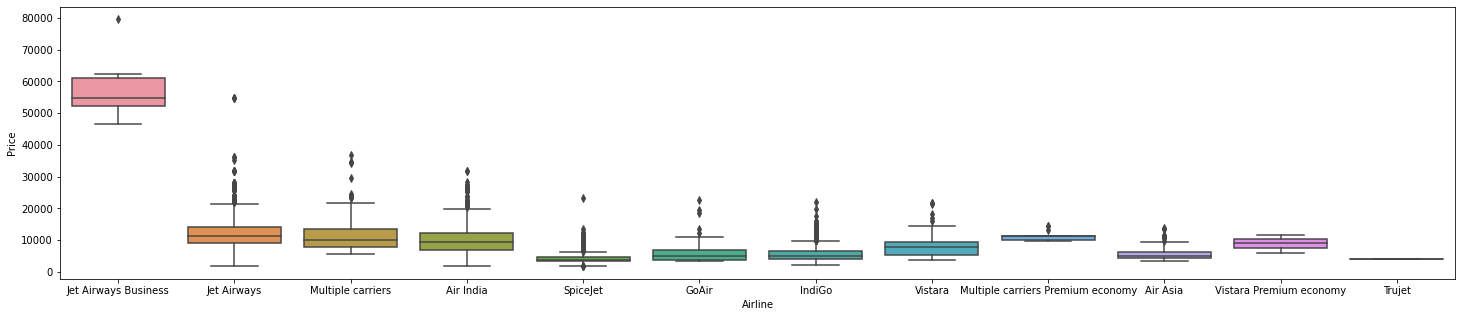

In [22]:
plt.figure(figsize=(25,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

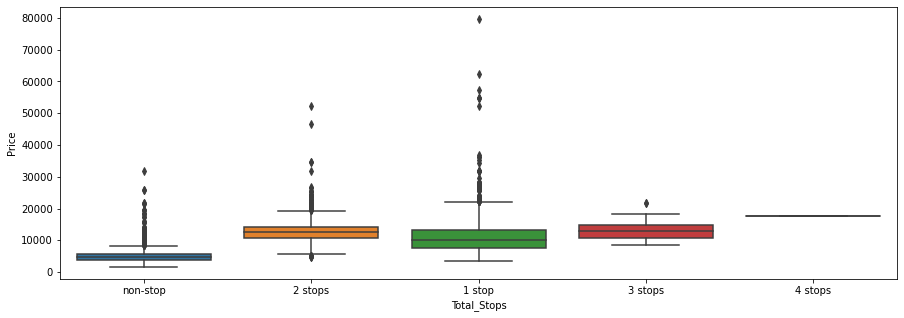

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=df)

In [24]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
Airline = pd.get_dummies(df['Airline'])
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [27]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

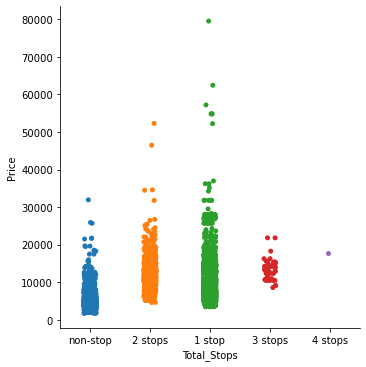

In [28]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Total_Stops',data=df)

In [29]:
Source= pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [31]:
Destination = pd.get_dummies(df['Destination'])
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [32]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
df.drop('Additional_Info',axis=1,inplace=True)

In [34]:
df['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [35]:
df['Route_1']=df['Route'].str.split('?').str[0]
df['Route_2']=df['Route'].str.split('?').str[1]
df['Route_3']=df['Route'].str.split('?').str[2]
df['Route_4']=df['Route'].str.split('?').str[3]
df['Route_5']=df['Route'].str.split('?').str[4]









In [36]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder=LabelEncoder()

In [39]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
       df[i]=encoder.fit_transform(df[i])

In [40]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2 stops,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1 stop,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1 stop,13302,3,1,16,50,21,35,0,34,8,13,5


In [41]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h ' + duration[i]

In [44]:
df['Duration']=duration

In [45]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [46]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [47]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2 stops,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1 stop,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1 stop,13302,3,1,16,50,21,35,0,34,8,13,5


In [48]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [49]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)


In [50]:
df.drop('Duration',axis=1,inplace=True)

In [51]:
pd.set_option('display.max_columns',35)

In [52]:
df.drop('Airline',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

In [53]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins
0,non-stop,3897,24,3,22,20,1,10,0,13,29,13,5,2,50
1,2 stops,7662,5,1,5,50,13,15,2,25,1,3,5,7,25
2,2 stops,13882,6,9,9,25,4,25,3,32,4,5,5,19,0
3,1 stop,6218,5,12,18,5,23,30,2,34,3,13,5,5,25
4,1 stop,13302,3,1,16,50,21,35,0,34,8,13,5,4,45


In [54]:
df.shape

(10682, 15)

In [57]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Hour',
       'Journey_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [58]:
from sklearn.feature_selection import mutual_info_classif

In [60]:
dic={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [61]:
df['Total_Stops']=df['Total_Stops'].map(dic)

In [64]:
y=df['Price']

In [65]:
X=df.drop('Price',axis=1)

In [66]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,0,13,29,13,5,2,50
1,2,7662,5,1,5,50,13,15,2,25,1,3,5,7,25
2,2,13882,6,9,9,25,4,25,3,32,4,5,5,19,0
3,1,6218,5,12,18,5,23,30,2,34,3,13,5,5,25
4,1,13302,3,1,16,50,21,35,0,34,8,13,5,4,45


In [67]:
mutual_info_classif(X,y)

array([2.16204026, 1.03869128, 0.83760338, 1.44494944, 1.24659873,
       1.84549649, 1.5326195 , 2.03197793, 2.76376682, 2.31278946,
       1.46273686, 0.72799252, 1.81538953, 1.08766954])

In [68]:
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [85]:
from sklearn import metrics
import numpy as np

In [89]:
 def model(algo):
        my_model = algo.fit(X_train,y_train)
        print('train_score:',my_model.score(X_train,y_train))
        y_pred=my_model.predict(X_test)
        r2_score=metrics.r2_score(y_test,y_pred)
        print('r2_score:',r2_score)
        mae=metrics.mean_absolute_error(y_test,y_pred)
        print('Mean absolute error:',mae)
        rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
        print('RMSE:',rmse)
        sns.distplot(y_test-y_pred)
        

In [90]:
from sklearn.linear_model import LinearRegression


train_score: 0.4679250617327547
r2_score: 0.4955588044880719
Mean absolute error: 2339.009172941366
RMSE: 3165.7062914194207


C:\Users\jntuacep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


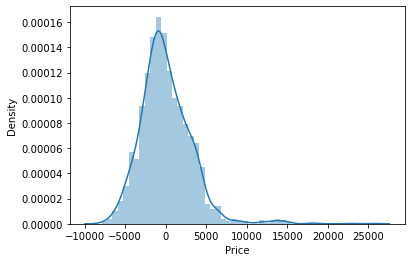

In [91]:
model(LinearRegression())

In [92]:
from sklearn.tree import DecisionTreeRegressor

train_score: 0.9635694422774501
r2_score: 0.6450787409482313
Mean absolute error: 1462.8034472001248
RMSE: 2655.408572250717


C:\Users\jntuacep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


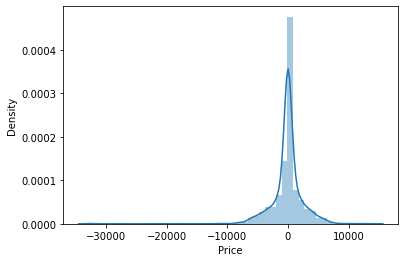

In [93]:
model(DecisionTreeRegressor())